In [92]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
X,y = boston['data'], boston.target

In [93]:
df = pd.DataFrame(X, columns = boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [95]:
df['CHAS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [96]:
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [97]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [98]:
# 범주형 컬럼 원핫인코딩

chas_df = pd.get_dummies(df['CHAS'])
chas_df

,0.0,1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
501,1,0
502,1,0
503,1,0
504,1,0


In [99]:
chas_df.columns = ['CHAS_0','CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [100]:
df2 = df.join([chas_df])

In [101]:
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1,0


In [102]:
df2.drop('CHAS', axis = 1, inplace = True)

In [103]:
df2

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1,0


In [104]:
y = df2['MEDV']
X = df2.drop(columns = 'MEDV')
X.shape, y.shape

((506, 14), (506,))

In [105]:
np.random.seed(10)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
train_columns = X_train.columns
train_columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [108]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
#linear regreesion

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_metrics(y,y_pred, title = None):
    mse = np.round(mean_squared_error(y,y_pred),3)
    rmse = np.round(np.sqrt(mse),3)
    mae = np.round(mean_absolute_error(y,y_pred),3)
    r2 = np.round(r2_score(y,y_pred),3)
    
    if title:
        print(title)
    print(f'MSE:{mse}, RMSE:{rmse}, MAE:{mae}, R2:{r2}')

In [111]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [112]:
X_train.shape

(404, 14)

In [113]:
lr.coef_.shape #컬럼별로 가중치

(14,)

In [114]:
print('가중치')
lr.coef_

가중치


array([-1.16449629,  1.49915257, -0.05268964, -1.91400079,  2.08637507,
        0.45488752, -3.15772431,  2.71071007, -2.07814318, -1.7549281 ,
        1.08897073, -4.10237313, -0.24654802,  0.24654802])

In [115]:
print('절편')
lr.intercept_

절편


21.84183168316832

In [116]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_metrics(y_train, pred_train, title = '리니어리그레서:트레인')
print_metrics(y_test, pred_test, title = '리니어리그레서 테스트')

리니어리그레서:트레인
MSE:19.231, RMSE:4.385, MAE:3.083, R2:0.75
리니어리그레서 테스트
MSE:34.414, RMSE:5.866, MAE:4.061, R2:0.671


In [117]:
np.mean(y)

22.532806324110698

findfont: Font family ['malgum gothic'] not found. Falling back to DejaVu Sans.
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\li

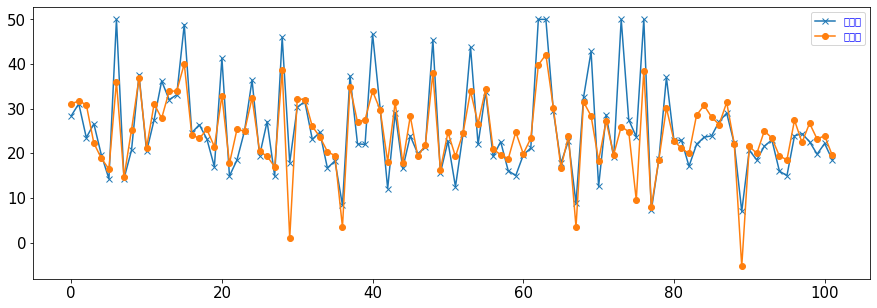

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(range(len(y_test)), y_test, label = '실제값', marker = 'x')
plt.plot(range(len(pred_test)), pred_test, label = '예측값', marker = 'o')

plt.legend()
plt.show()

#  다항회귀
- polynomialfeature transformer 사용

In [119]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'malgum gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [120]:
m = 100
X = 6*np.random.rand(m,1) -3 #rand : 0~1사이 실수 뽑아0~1사이 실수 뽑아
y = X**2 + X+2+np.random.normal(0.1, size = (m,1)) # 뒤에 난수 넣은 부분은 잡음. 모델이 여기까지는학습 못해
X.shape, y.shape

((100, 1), (100, 1))

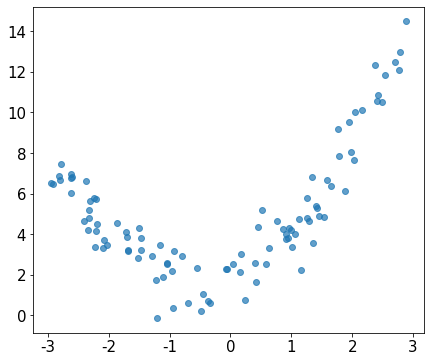

In [121]:
plt.figure(figsize = (7,6))
plt.scatter(X,y, alpha = 0.7)
plt.show()

In [122]:
#일단 선형모델로

In [123]:
lr.fit(X,y)
lr.coef_, lr.intercept_

(array([[0.80688141]]), array([5.13010368]))

In [124]:
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
pred = lr.predict(X)
mean_squared_error(y,pred), r2_score(y, pred)

(7.521143122544466, 0.20594133771687428)

In [126]:
np.mean(y)

4.996750492847578

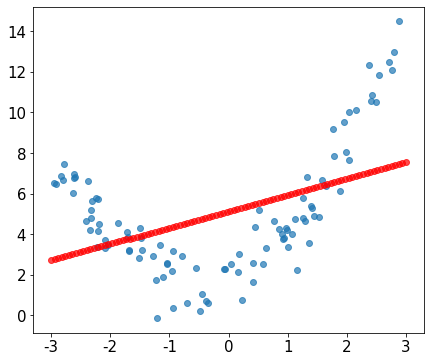

In [127]:
X_new = np.linspace(-3,3,100).reshape(-1,1)
pred_new = lr.predict(X_new) #새로운 100개의 값 예측해봐라.

plt.figure(figsize = (7,6))
plt.scatter(X,y , alpha = 0.7)
plt.scatter(X_new, pred_new, alpha = 0.7, color = 'red')

In [128]:
from sklearn.preprocessing import PolynomialFeatures

In [129]:
poly_f = PolynomialFeatures(degree = 2)
X_poly = poly_f.fit_transform(X)

In [130]:
X.shape, y.shape

((100, 1), (100, 1))

In [131]:
X_poly.shape

(100, 3)

In [132]:
poly_f = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_f.fit_transform(X)

In [133]:
poly_f.get_feature_names()

['x0', 'x0^2']

In [134]:
lr2 = LinearRegression()
lr2.fit(X_poly,y)

lr2.coef_, lr2.intercept_

(array([[1.10699305, 1.03609309]]), array([2.04717129]))

In [135]:
pred2 = lr2.predict(X_poly)

In [136]:
mean_squared_error(y, pred2), r2_score(y,pred2)

(0.9050468274177637, 0.9044479992770291)

In [137]:
X_new_poly = poly_f.transform(X_new)
X_new_poly.shape

(100, 2)

In [138]:
y_new2 = lr2.predict(X_new_poly)

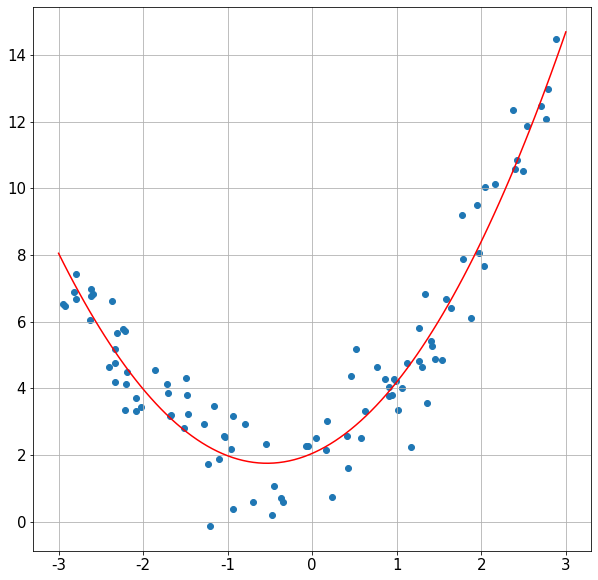

In [139]:
plt.figure(figsize = (10,10))
plt.scatter(X,y)
plt.plot(X_new, y_new2, color = 'r')
plt.grid(True)

In [140]:
data = np.arange(9).reshape(3,3)
data.shape

(3, 3)

In [141]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [142]:
poly_f2 = PolynomialFeatures(degree = 2)
data_poly = poly_f2.fit_transform(data)
data_poly.shape

(3, 10)

In [143]:
poly_f2.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [149]:
#다항회귀를 보스턴 데이터셋에 적용
poly_f = PolynomialFeatures(degree = 2, include_bias = False)
X_train_scaled_poly = poly_f.fit_transform(X_train_scaled)
X_test_scaled_poly = poly_f.transform(X_test_scaled)
X_train_scaled.shape, X_train_scaled_poly.shape

((404, 14), (404, 119))

In [150]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly, y_train)

pred_train2 = lr.predict(X_train_scaled_poly)
pred_test2 = lr.predict(X_test_scaled_poly)

In [146]:
print('폴리노미널 적용 전 결과')
print_metrics(y_train, pred_train, 'train')
print_metrics(y_test, pred_test, 'test')

폴리노미널 적용 전 결과
train
MSE:19.231, RMSE:4.385, MAE:3.083, R2:0.75
test
MSE:34.414, RMSE:5.866, MAE:4.061, R2:0.671


In [148]:
print('폴리노미널 적용 후')
print_metrics(y_train, pred_train2)
print_metrics(y_test, pred_test2)

폴리노미널 적용 후
MSE:0.0, RMSE:0.0, MAE:0.0, R2:1.0
MSE:1553.112, RMSE:39.41, MAE:14.177, R2:-13.851


In [151]:
print('폴리노미널 적용 후') #degree 2
print_metrics(y_train, pred_train2)
print_metrics(y_test, pred_test2)

폴리노미널 적용 후
MSE:5.239, RMSE:2.289, MAE:1.673, R2:0.932
MSE:13.073, RMSE:3.616, MAE:2.818, R2:0.875


In [154]:
# 릿지
from sklearn.linear_model import Ridge

ridge_1 = Ridge(alpha = 1)
ridge_1.fit(X_train_scaled, y_train)

pred_train = ridge_1.predict(X_train_scaled)
pred_test = ridge_1.predict(X_test_scaled)

In [155]:
print_metrics(y_train, pred_train, 'ridge, alpha = 1, train')
print_metrics(y_test,pred_test, 'redge alpha = 1 test')

ridge, alpha = 1, train
MSE:19.233, RMSE:4.386, MAE:3.079, R2:0.75
redge alpha = 1 test
MSE:34.392, RMSE:5.864, MAE:4.058, R2:0.671


In [156]:
# 그리드섯치로 가장 적합한 알파 찾아보자
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.01, 0.1,0.5,1,10,20,30,40,50,100]}

ridge = Ridge()
gs = GridSearchCV(ridge, param_grid = param, cv= 5, n_jobs = -1, scoring = ['r2','neg_mean_squared_error'], refit = 'r2')

In [157]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 20, 30, 40, 50, 100]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [160]:
import pandas as pd
result = pd.DataFrame(gs.cv_results_).sort_values('rank_test_neg_mean_squared_error')
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,...,std_test_r2,rank_test_r2,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
3,0.003589,0.001352,0.002794,0.001162,1,{'alpha': 1},0.661994,0.789958,0.771456,0.731700,...,0.059363,2,-24.339964,-13.684151,-21.232345,-20.745649,-26.880114,-21.376445,4.442136,1
2,0.003175,0.000372,0.002193,0.000398,0.5,{'alpha': 0.5},0.662424,0.788784,0.771422,0.731502,...,0.058909,3,-24.308956,-13.760694,-21.235537,-20.760927,-26.859106,-21.385044,4.405842,2
1,0.002710,0.000375,0.001956,0.000075,0.1,{'alpha': 0.1},0.662768,0.787787,0.771388,0.731338,...,0.058538,4,-24.284222,-13.825611,-21.238666,-20.773621,-26.843758,-21.393176,4.375906,3
4,0.002839,0.000408,0.002546,0.000547,10,{'alpha': 10},0.654447,0.802549,0.771162,0.734185,...,0.065913,1,-24.883436,-12.863881,-21.259647,-20.553530,-27.414400,-21.394979,4.937788,4
0,0.011226,0.003393,0.003004,0.000665,0.01,{'alpha': 0.01},0.662845,0.787556,0.771380,0.731301,...,0.058453,5,-24.278669,-13.840694,-21.239445,-20.776538,-26.840502,-21.395170,4.369056,5
5,0.002991,0.000029,0.002584,0.000482,20,{'alpha': 20},0.647075,0.807356,0.769775,0.735425,...,0.070713,6,-25.414243,-12.550709,-21.388494,-20.457650,-28.056293,-21.573478,5.281439,6
6,0.002793,0.000399,0.002598,0.000802,30,{'alpha': 30},0.640732,0.808266,0.767774,0.735697,...,0.074015,7,-25.871018,-12.491419,-21.574430,-20.436612,-28.646565,-21.804009,5.513764,7
7,0.002584,0.000501,0.002603,0.000476,40,{'alpha': 40},0.635177,0.807232,0.765349,0.735303,...,0.076391,8,-26.271077,-12.558764,-21.799715,-20.467079,-29.183832,-22.056093,5.680857,8
8,0.002785,0.000396,0.002801,0.000404,50,{'alpha': 50},0.630210,0.805089,0.762612,0.734413,...,0.078153,9,-26.628729,-12.698387,-22.054003,-20.535849,-29.677760,-22.318945,5.805707,9
9,0.002983,0.000020,0.002392,0.000799,100,{'alpha': 100},0.610381,0.787826,0.746323,0.725473,...,0.082301,10,-28.056618,-13.823070,-23.567309,-21.227176,-31.733355,-23.681505,6.118814,10


In [161]:
result.filter(like ='mean_test').join(result.filter(like ='param'))

,mean_test_r2,mean_test_neg_mean_squared_error,param_alpha,params
3,0.718794,-21.376445,1,{'alpha': 1}
2,0.718655,-21.385044,0.5,{'alpha': 0.5}
1,0.718526,-21.393176,0.1,{'alpha': 0.1}
4,0.718805,-21.394979,10,{'alpha': 10}
0,0.718495,-21.395170,0.01,{'alpha': 0.01}
5,0.716538,-21.573478,20,{'alpha': 20}
6,0.713520,-21.804009,30,{'alpha': 30}
7,0.710194,-22.056093,40,{'alpha': 40}
8,0.706720,-22.318945,50,{'alpha': 50}
9,0.688732,-23.681505,100,{'alpha': 100}


In [164]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

g = GradientBoostingRegressor(n_estimators = 100, max_depth = 5)
g.fit(X_train_scaled, y_train)
print(mean_squared_error(y_train, g.predict(X_train_scaled)))
print(mean_squared_error(y_test, g.predict(X_test_scaled))) 

0.13560496583947124
15.086332020768387


In [165]:
g = XGBRegressor(n_estimators = 100, max_depth = 3)
g.fit(X_train_scaled,y_train)
print(mean_squared_error(y_train, g.predict(X_train_scaled)))
print(mean_squared_error(y_test, g.predict(X_test_scaled))) 

0.3465462248127323
10.635201710454098


In [166]:
g = XGBRegressor(n_estimators = 100, max_depth = 5)
g.fit(X_train_scaled,y_train)
print(mean_squared_error(y_train, g.predict(X_train_scaled)))
print(mean_squared_error(y_test, g.predict(X_test_scaled))) 

0.003283429736745447
13.158550631575126


In [167]:
g.feature_importances_

array([0.01980394, 0.00212363, 0.01010223, 0.04051174, 0.25037515,
       0.00913959, 0.05622688, 0.02058767, 0.03436975, 0.04303146,
       0.01428771, 0.4698628 , 0.02957752, 0.        ], dtype=float32)

	**Ridge alpha 0: train**
MSE:19.309, RMSE:4.394, MAE:3.087, R2:0.749
	**Ridge alpha 0: test**
MSE:34.77, RMSE:5.897, MAE:4.073, R2:0.668
--------------------------------------------------
	**Ridge alpha 0.1: train**
MSE:19.231, RMSE:4.385, MAE:3.083, R2:0.75
	**Ridge alpha 0.1: test**
MSE:34.412, RMSE:5.866, MAE:4.061, R2:0.671
--------------------------------------------------
	**Ridge alpha 1: train**
MSE:19.233, RMSE:4.386, MAE:3.079, R2:0.75
	**Ridge alpha 1: test**
MSE:34.392, RMSE:5.864, MAE:4.058, R2:0.671
--------------------------------------------------
	**Ridge alpha 10: train**
MSE:19.344, RMSE:4.398, MAE:3.051, R2:0.749
	**Ridge alpha 10: test**
MSE:34.304, RMSE:5.857, MAE:4.037, R2:0.672
--------------------------------------------------
	**Ridge alpha 100: train**
MSE:21.586, RMSE:4.646, MAE:3.109, R2:0.72
	**Ridge alpha 100: test**
MSE:36.307, RMSE:6.026, MAE:4.153, R2:0.653
--------------------------------------------------
	**Ridge alpha 200: train**
MSE:23.931, RMSE

findfont: Font family ['malgum gothic'] not found. Falling back to DejaVu Sans.


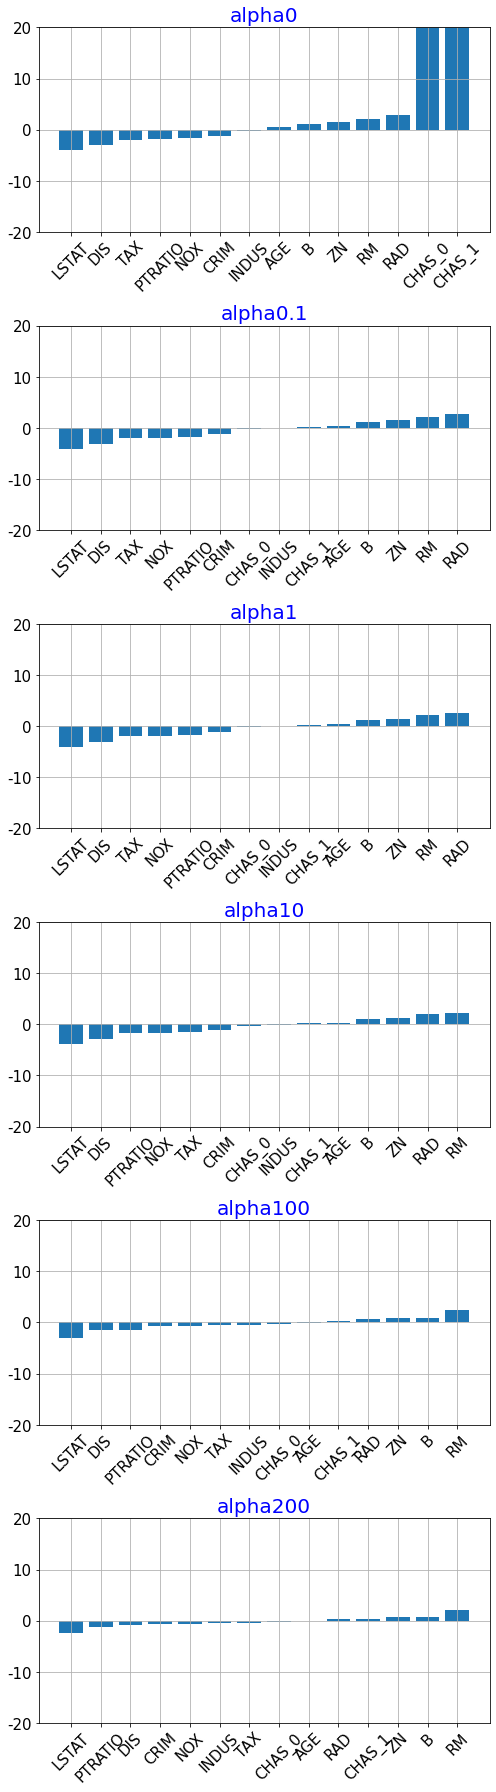

In [170]:
#규제 알파에 따른 가중치 변화
import matplotlib.pyplot as plt
np.random.seed(1)
alpha_list = [0,0.1,1,10,100,200]
coef_df = pd.DataFrame()


plt.figure(figsize = (7,25))
for idx, alpha in enumerate(alpha_list, start = 1):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train_scaled, y_train)
    
    pred_train = ridge.predict(X_train_scaled)
    pred_test = ridge.predict(X_test_scaled)
    
    print_metrics(y_train, pred_train, f'\t**Ridge alpha {alpha}: train**')
    print_metrics(y_test, pred_test, f'\t**Ridge alpha {alpha}: test**')
    print("-"*50)
    
    w = pd.Series(np.round(ridge.coef_,3), index = X_train.columns).sort_values()
    coef_df[f'alpha {alpha}'] = w
    
            
    plt.subplot(6,1,idx)
    plt.bar(x = w.index, height = w)
    plt.xticks(rotation = 45)
    plt.ylim(-20,20)
    plt.title(f'alpha{alpha}')
    plt.grid(True)
            
plt.tight_layout()
plt.show()

In [171]:
coef_df

,alpha 0,alpha 0.1,alpha 1,alpha 10,alpha 100,alpha 200
LSTAT,-4.021000e+00,-4.100,-4.082,-3.915,-2.956,-2.428
DIS,-3.042000e+00,-3.154,-3.122,-2.832,-1.475,-0.933
TAX,-2.030000e+00,-2.070,-1.999,-1.489,-0.543,-0.455
PTRATIO,-1.867000e+00,-1.754,-1.746,-1.681,-1.389,-1.223
NOX,-1.687000e+00,-1.911,-1.881,-1.631,-0.776,-0.573
CRIM,-1.218000e+00,-1.163,-1.153,-1.071,-0.779,-0.671
INDUS,-2.270000e-01,-0.055,-0.076,-0.218,-0.464,-0.499
AGE,5.080000e-01,0.454,0.441,0.341,-0.031,-0.154
B,1.127000e+00,1.089,1.088,1.078,0.935,0.802
ZN,1.579000e+00,1.497,1.477,1.318,0.778,0.633


In [172]:
#라소 리그레션
from sklearn.linear_model import Lasso

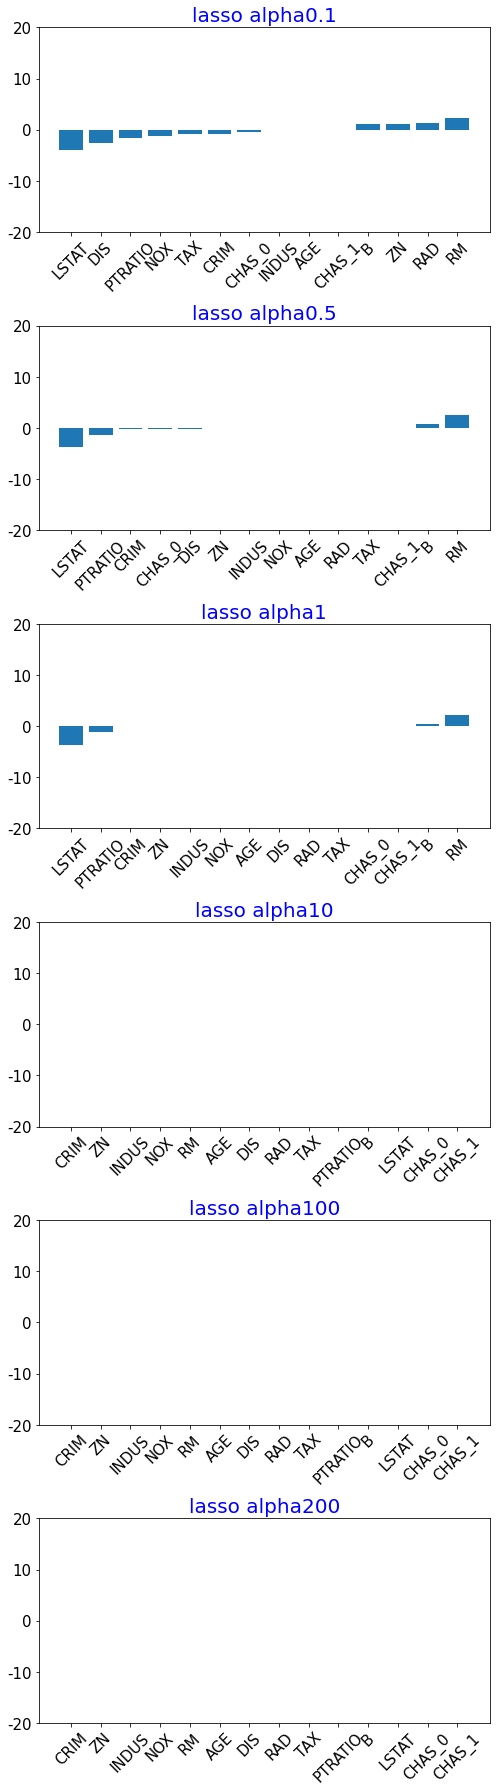

In [176]:
import matplotlib.pyplot as plt

alpha_list = [0.1, 0.5, 1, 10, 100, 200]

lasso_coef_df = pd.DataFrame()

plt.figure(figsize= (7,25))
for idx, alpha in enumerate(alpha_list, start = 1):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train_scaled, y_train)
    
    w = pd.Series(lasso.coef_, index = X_train.columns).sort_values()
    lasso_coef_df[f'alpha{alpha}'] = w
    
    plt.subplot(6,1,idx)
    plt.bar(x = w.index, height = w)
    plt.xticks(rotation = 45)
    plt.ylim(-20,20)
    plt.title(f'lasso alpha{alpha}')
    
plt.tight_layout()
plt.show()

In [177]:
#엘라스틱넷 : 릿지 라쏘 섞어서

In [178]:
from sklearn.linear_model import ElasticNet

e = ElasticNet(alpha = 0.1, l1_ratio = 0.6)
e.fit(X_train_scaled, y_train)

pred_train = e.predict(X_train_scaled)
pred_test = e.predict(X_test_scaled)

In [179]:
print_metrics(y_train, pred_train, title='ElasticNet alpha 0.1: Train')
print_metrics(y_test, pred_test, title="ElasticNet alpha 0.1: Trest")

ElasticNet alpha 0.1: Train
MSE:19.854, RMSE:4.456, MAE:3.039, R2:0.742
ElasticNet alpha 0.1: Trest
MSE:34.342, RMSE:5.86, MAE:4.025, R2:0.672
